<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">

**Александр, привет!** 👋

Меня зовут Алексей Манелюк, я буду проверять твой проект. В Яндекс Практикуме принято общаться на "ты" 😉, но если некомфортно - скажи и перейдем на "Вы".

Моя цель - не указать на ошибки, а поделиться опытом и помочь в освоении анализа данных.

В тетрадке ты увидишь мои комментарии, пожалуйста, не удаляй, не перемещай и не изменяй их. У комментариев могут быть приписки **V2**, **V3**, **V...**, которые соответствуют каждой версии проверки. 
    
Я буду использовать цветовую разметку:
<p>
<div class="alert-danger" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ❌</b>

Так выделены критические замечания. Без их отработки я не смогу принять проект. </div>

<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>  Комментарий ревьюера ⚠️</b>

Так выделены небольшие замечания или полезные советы. Постарайся учесть их.</div>
<p>
<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Так выделены правильные решения.</div>

Предлагаю работать в диалоге: если что-то дорабатываешь или отвечаешь на мой комментарий - пиши об этом. Мне будет удобней, если ты выделишь свои комментарии:
<p>
<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Здесь исправил.</div>

Все это поможет мне быстрее принять твой проект.</div>

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Написать свой комментарий можно, скопировав этот блок в ячейку Markdown.</div>

# Исследование рентабельности подписочной системы в сервисе GoFast

Условия использования сервиса:  
1. без подписки:  
    * абонентская плата отсутствует;
    * стоимость одной минуты поездки — 8 рублей;
    * стоимость старта (начала поездки) — 50 рублей;
2. с подпиской Ultra:  
    * абонентская плата — 199 рублей в месяц;
    * стоимость одной минуты поездки — 6 рублей;
    * стоимость старта — бесплатно.  
  
Имеется информация о пользователях, их поездках и подписках:
1. users_go.csv - информация о пользователях  
2. rides_go.csv - информация о поездках пользователей  
  
Цель исследования: на основании имеющихся данных понять, выгодна ли подписка Ultra компании GoFast

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Отлично, что начал с описания проекта.

Можно добавить краткий план исследования.</div>

In [1]:
import pandas as pd
import numpy as np
from math import sqrt
from scipy import stats as st
from scipy.stats import norm, binom
from matplotlib import pyplot as plt

#### Шаг 1. Загрузка данных

In [2]:
users = pd.read_csv('/datasets/users_go.csv')
rides = pd.read_csv('/datasets/rides_go.csv')
subscriptions = pd.read_csv('/datasets/subscriptions_go.csv')

In [3]:
users.info()
start_users_size = users.shape[0]
users.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
5,6,Регина,25,Краснодар,ultra
6,7,Игорь,23,Омск,ultra
7,8,Юрий,23,Краснодар,ultra
8,9,Ян,21,Пятигорск,ultra
9,10,Валерий,18,Екатеринбург,ultra


По информации видно, что набор данных не содержит пропущенных значений. Изменение типов не требуется.

In [4]:
rides.info()
rides.head(20)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
5,1,2770.890808,16.650138,2021-10-09
6,1,3039.020292,14.927879,2021-10-19
7,1,2842.118050,23.117468,2021-11-06
8,1,3412.690668,15.238072,2021-11-14
9,1,748.690645,15.041884,2021-11-22


По информации видно, что набор данных не содержит пропущенных значений. Столбец `date` требует изменения типа данных

In [5]:
subscriptions.info()
subscriptions.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


По информации видно, что набор данных не содержит пропущенных значений. Изменение типов не требуется.

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Данные загружены верно, получена общая информация о датафреймах. 🚀</div>

#### Шаг 2. Предобработка данных

In [6]:
rides['date'] = pd.to_datetime(rides['date'], format='%Y-%m-%d')

In [7]:
rides['month'] = rides['date'].dt.month
rides.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   18068 non-null  int64         
 1   distance  18068 non-null  float64       
 2   duration  18068 non-null  float64       
 3   date      18068 non-null  datetime64[ns]
 4   month     18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 705.9 KB


In [8]:
print(f'В датасете представлены данный с {rides["date"].min().date()} по {rides["date"].max().date()}')

В датасете представлены данный с 2021-01-01 по 2021-12-30


<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ⚠️</b>

<s>Здесь можно проверить за какой период у нас данные.</div>

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Добавил информацию о периоде</div>

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера V2 ✔️</b>

Провести такую проверку важно, чтобы данные за несколько лет не склеились при агрегации по месяцам.</div>

Проверим наличие дубликатов в датасете `rides`

In [9]:
rides.duplicated().sum()

0

Датасет `rides` не содержит явных дубликатов. Поэтому далее проверим датасет `users`. Однако перед этим избавимся от неявных дубликатов, приведя строковые столбцы к нижнему регистру и заменив `ё` на `е`

In [10]:
columns = ['name', 'city', 'subscription_type']
for column in columns:
    users[column] = users[column].str.lower()
    users[column] = users[column].str.replace('ё', 'e')

In [11]:
users.duplicated().sum()

31

In [12]:
users = users.drop_duplicates().reset_index(drop=True)
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1534 non-null   int64 
 1   name               1534 non-null   object
 2   age                1534 non-null   int64 
 3   city               1534 non-null   object
 4   subscription_type  1534 non-null   object
dtypes: int64(2), object(3)
memory usage: 60.0+ KB


In [13]:
print(f'После предобратки данных в датасете "users" сохранился {users.shape[0]/start_users_size:.2%} данных')

После предобратки данных в датасете "users" сохранился 98.02% данных


<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Молодец, ты отлично справился с предобработкой данных! 🔥</div>

#### Шаг 3. Исследовательский анализ данных

##### Частота встречаемости городов

In [14]:
cities = (
    users
    .pivot_table(index='city', values='user_id', aggfunc='count')
    .rename(columns={'user_id': 'count'})
    .sort_values(by='count', ascending=False)
)
cities

,count
city,
пятигорск,219
екатеринбург,204
ростов-на-дону,198
краснодар,193
сочи,189
омск,183
тюмень,180
москва,168


<AxesSubplot:title={'center':'Распределение пользователей по городам'}, xlabel='city'>

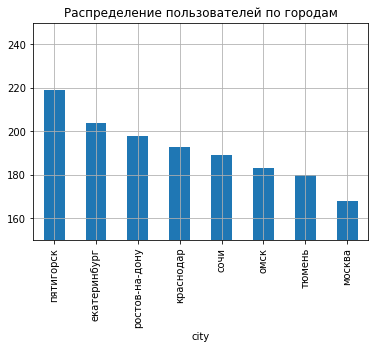

In [15]:
cities['count'].plot(
    kind='bar',
    grid=True,
    ylim=(150, 250),
    title='Распределение пользователей по городам'
)

<div class="alert-danger" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ❌</b>

<s>Это неудачный тип визуализации для сравнения категорий:
   
- слишком много категорий
- категории примерно одинаковые, сложно выделить лидеров
    
Для сравнения категорий больше подходит столбчатая диаграмма.
</div>

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Изменил тип диаграммы с крговой на столбчатую</div>

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера V2 ✔️</b>

Отлично. Можно еще убрать сетку и развернуть либо график на 90 градусов (тип графика `'barh'`), либо подписи к оси Х параметром `rot=`</div>

Сервис присутствует в 8 городах. Нет сильно выделяющегося города по количеству пользователей. Однако наибольшее количество пользователей находится в Пятигорске (219 человек), а наименьшее в Москве (168 человек).

##### Соотношение пользователей с подпиской и без подписки

In [16]:
subscription = (
    users
    .pivot_table(index='subscription_type', values='user_id', aggfunc='count')
    .rename(columns={'user_id': 'count'})
)
subscription

,count
subscription_type,
free,835
ultra,699


In [17]:
percent_subsciption = subscription.loc['ultra', 'count'] / users.shape[0]
print(f'Процент пользователей с подпиской - {percent_subsciption:.2%}')

Процент пользователей с подпиской - 45.57%


<AxesSubplot:title={'center':'Соотношение пользователей с подпиской и без'}, ylabel='count'>

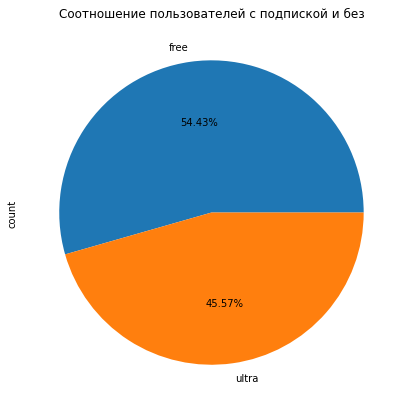

In [18]:
subscription['count'].plot(
    kind='pie',
    autopct='%.2f%%',
    figsize=(7, 7),
    title='Соотношение пользователей с подпиской и без'
)

Видно, что пользователй с подпиской меньше половины, однако их количество все равно составляет внушитиельные 45,57%.

<div class="alert-danger" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ❌</b>

<s>Соотношение категорий пользователей тоже нужно визуализировать. Вот здесь подойдет круговая диаграмма, она хорошо показывает части целого.
</div>

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Добавил круговую диаграмму</div>

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера V2 ✔️</b>

Теперь все отлично! 👍</div>

##### Возраст пользователей

Добави в датасет `users` возрастную категорию пользователя:  
1. child - пользователи до 18 лет  
2. youth пользователи от 18 до 30 лет  
3. adult - пользователи старше 30 лет

In [19]:
def get_age_category(age):
    if age < 18:
        return 'child'
    elif age < 30:
        return 'youth'
    return 'adult'

In [20]:
users['age_category'] = users['age'].apply(get_age_category)

In [21]:
print(f'Самому младшему пользователю {users["age"].min()} лет')
print(f'Самому старшему пользователю {users["age"].max()} года')
print(f'Средний возраст пользователей {users["age"].mean()} лет')

Самому младшему пользователю 12 лет
Самому старшему пользователю 43 года
Средний возраст пользователей 24.903520208604956 лет


<AxesSubplot:title={'center':'Распределение пользователей по возрастам'}, ylabel='Frequency'>

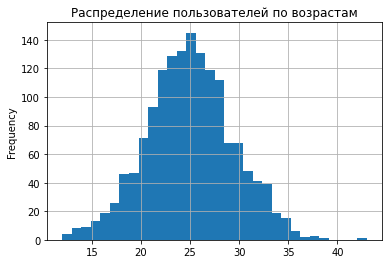

In [22]:
users['age'].plot(
    kind='hist',
    grid=True,
    title='Распределение пользователей по возрастам',
    bins=32
)

In [23]:
age = (
    users
    .pivot_table(index='city', values='age', aggfunc=['min', 'max', 'mean'])
    .reset_index().droplevel(1, axis=1)
    .set_index('city')
    .sort_values(by='mean', ascending=False)
)
age

,min,max,mean
city,,,
омск,13,38,25.382514
краснодар,13,38,25.290155
москва,13,43,25.267857
екатеринбург,13,35,24.955882
пятигорск,12,36,24.716895
тюмень,13,38,24.638889
ростов-на-дону,12,37,24.545455
сочи,12,36,24.507937


<AxesSubplot:title={'center':'Средний возраст пользователей в разных городах'}, xlabel='city'>

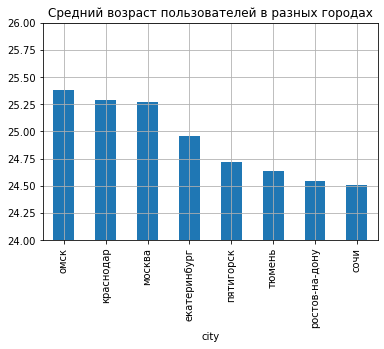

In [24]:
age['mean'].plot(
    kind='bar',
    grid=True,
    title='Средний возраст пользователей в разных городах',
    ylim=(24, 26)
)

In [25]:
age_category = (
    users
    .pivot_table(index='age_category', values='age', aggfunc='count')
)
age_category

,age
age_category,
adult,243
child,79
youth,1212


<AxesSubplot:title={'center':'Распределение пользователей по возрастным категориям'}, ylabel='age'>

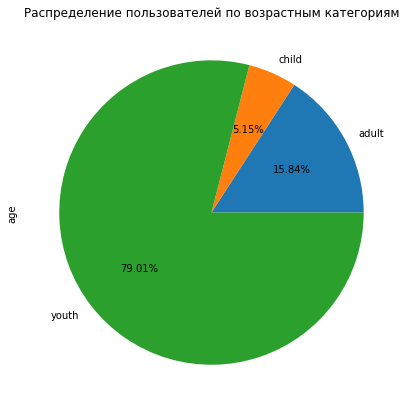

In [26]:
age_category['age'].plot(
    kind='pie',
    autopct='%.2f%%',
    figsize=(7, 7),
    title='Распределение пользователей по возрастным категориям'
)

Сервис охватывает широкий диапазон возврастных категорий. Самому младшему пользователю 12 лет, а самому старшему 43. Средний возраст - 24.9 года. Распределение возрастов пользавателей похоже на нормальное распределение  
Самый маленький средний возраст пользователей в Сочи (24,5 лет), самый высокий в Омске (25.4 года).  
Также можно заметить, что польшинство пользователей находятся в ворасте от 18 до 30 лет. Данная категория является платежеспособной, а также заинтересованной в постоянном использовании самокатов для быстрого перемещения по городу. Лишь 5,15% пользователей относятся к категории до 18 лет. Это хорошо, так как платежеспособность данной категории вызывает вопросы

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Молодец, ты очень подробно изучил возраст пользователей. 👍</div>

##### Расстояние, которое пользователь преодолел за одну поездку;

In [27]:
print(f'В среднем пользователь сервиса проезжает расстояние в {rides["distance"].mean():.2f} м')

В среднем пользователь сервиса проезжает расстояние в 3070.66 м


<AxesSubplot:title={'center':'Распределение дистанции, которая была пройдена за одну поездку'}, ylabel='Frequency'>

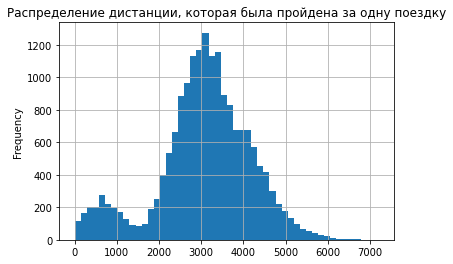

In [28]:
rides['distance'].plot(
    kind='hist',
    bins=50,
    grid=True,
    title='Распределение дистанции, которая была пройдена за одну поездку'
)

Распределение дистации за поездку имеет 2 пика, каждый из которых напоминает нормальное распределение. Первый пик имеет вершину на значении примерно 600 м, второй - 3200 м. В среднем пользователи сервиса проезжают 3070 м.

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Всё верно. Поездки делятся на короткие и длинные.</div>

##### Продолжительность поездок

In [29]:
print(f'В среднем поездка пользователя сервиса занимает {rides["duration"].mean():.2f} мин')

В среднем поездка пользователя сервиса занимает 17.81 мин


<AxesSubplot:title={'center':'Распределение времени одной поездки'}, ylabel='Frequency'>

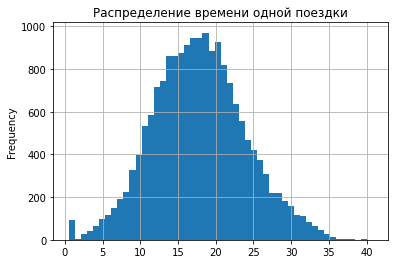

In [30]:
rides['duration'].plot(
    kind='hist',
    bins=50,
    grid=True,
    title='Распределение времени одной поездки'
)

Дистанция, которую в среднем проезжает каждый пользователь, распределена нормально. Однако наблюдается всплеск около продолжительности поездки в 1 мин. В среднем пользователи сервиса проезжают 17,81 мин.

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Согласен, а основной диапазон 10 - 25 мин.</div>

#### Шаг 4. Объединение данных

##### Объединение датасетов

In [31]:
rides_users = rides.merge(users, on='user_id', how='left')
rides_users.info()
rides_users.head(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   age_category       18068 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(4)
memory usage: 1.5+ MB


,user_id,distance,duration,date,month,name,age,city,subscription_type,age_category
0,1,4409.919140,25.599769,2021-01-01,1,кира,22,тюмень,ultra,youth
1,1,2617.592153,15.816871,2021-01-18,1,кира,22,тюмень,ultra,youth
2,1,754.159807,6.232113,2021-04-20,4,кира,22,тюмень,ultra,youth
3,1,2694.783254,18.511000,2021-08-11,8,кира,22,тюмень,ultra,youth
4,1,4028.687306,26.265803,2021-08-28,8,кира,22,тюмень,ultra,youth
5,1,2770.890808,16.650138,2021-10-09,10,кира,22,тюмень,ultra,youth
6,1,3039.020292,14.927879,2021-10-19,10,кира,22,тюмень,ultra,youth
7,1,2842.118050,23.117468,2021-11-06,11,кира,22,тюмень,ultra,youth
8,1,3412.690668,15.238072,2021-11-14,11,кира,22,тюмень,ultra,youth
9,1,748.690645,15.041884,2021-11-22,11,кира,22,тюмень,ultra,youth


In [32]:
all_data = rides_users.merge(subscriptions, on='subscription_type')
all_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   distance           18068 non-null  float64       
 2   duration           18068 non-null  float64       
 3   date               18068 non-null  datetime64[ns]
 4   month              18068 non-null  int64         
 5   name               18068 non-null  object        
 6   age                18068 non-null  int64         
 7   city               18068 non-null  object        
 8   subscription_type  18068 non-null  object        
 9   age_category       18068 non-null  object        
 10  minute_price       18068 non-null  int64         
 11  start_ride_price   18068 non-null  int64         
 12  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memory 

##### Создание датасетов для пользователей с подпиской и без

In [33]:
users_free = all_data.query('subscription_type == "free"')
users_ultra = all_data.query('subscription_type == "ultra"')

users_free.info()
users_ultra.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11568 entries, 6500 to 18067
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            11568 non-null  int64         
 1   distance           11568 non-null  float64       
 2   duration           11568 non-null  float64       
 3   date               11568 non-null  datetime64[ns]
 4   month              11568 non-null  int64         
 5   name               11568 non-null  object        
 6   age                11568 non-null  int64         
 7   city               11568 non-null  object        
 8   subscription_type  11568 non-null  object        
 9   age_category       11568 non-null  object        
 10  minute_price       11568 non-null  int64         
 11  start_ride_price   11568 non-null  int64         
 12  subscription_fee   11568 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(4)
memo

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Данные объединены верно и отдельные датафреймы созданы правильно. 👍</div>

##### Визуализация информацию о расстоянии и времени поездок для пользователей обеих категорий

###### Пользователи без подписки

In [34]:
print(f'В среднем поездка пользователя без подписки занимает {users_free["duration"].mean():.2f} мин')

В среднем поездка пользователя без подписки занимает 17.39 мин


<AxesSubplot:title={'center':'Распределение времени поездки для пользователей без подписки'}, ylabel='Frequency'>

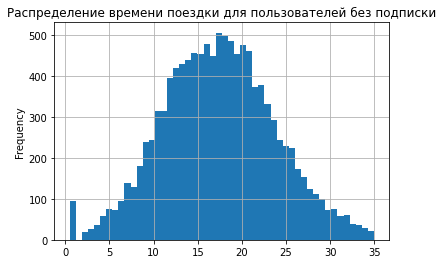

In [35]:
users_free['duration'].plot(
    kind='hist',
    bins=50,
    grid=True,
    title='Распределение времени поездки для пользователей без подписки'
)

<AxesSubplot:title={'center':'Распределение времени поездки до 5 мин для пользователей без подписки'}, ylabel='Frequency'>

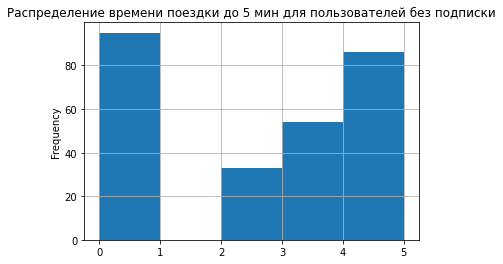

In [36]:
users_free['duration'].plot(
    kind='hist',
    bins=5,
    range=(0,5),
    grid=True,
    title='Распределение времени поездки до 5 мин для пользователей без подписки'
)

In [37]:
print(f'В среднем пользователь без подписки проезжает расстояние в {users_free["distance"].mean():.2f} м')

В среднем пользователь без подписки проезжает расстояние в 3045.50 м


<AxesSubplot:title={'center':'Распределение дистации поездки для пользователей без подписки'}, ylabel='Frequency'>

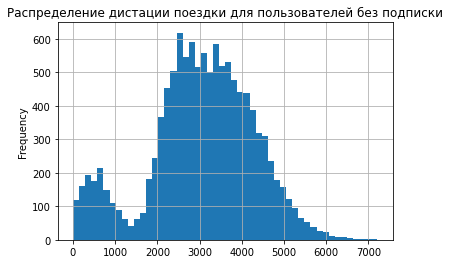

In [38]:
users_free['distance'].plot(
    kind='hist',
    bins=50,
    grid=True,
    title='Распределение дистации поездки для пользователей без подписки'
)

In [39]:
mean_rides_free = users_free.shape[0] / len(users_free['user_id'].unique())
print(f'В среднем пользователь без подписки совершает {mean_rides_free:.2f} поездки')

В среднем пользователь без подписки совершает 13.85 поездки


**Вывод:** Среднее время поездки пользователей без подписки составляеет 17,39 мин. На графике распределения времени наблюдается всплеск поездой до 1 мин. Это может быть связано с тем, что пользователь  удаленно забронировал самокат, но не обратил внимание на то, что он разряжен или он ему просто не понравился. Однако деньги за старт он уже заплатил. На графике распределения дистанции за поездку наблюдается 2 пика. Скорее всего, это поездки, когда пользователи используют самокат, чтобы быстро добраться до остановки, метро, магазина. Срднее расстояние поездки составляет 3045.5 м. Также стоит отметить, что в среднем пользователь без подписки совершает 13,85 поездки.

###### Пользователи без подписки

In [40]:
print(f'В среднем поездка пользователя с подпиской занимает {users_ultra["duration"].mean():.2f} мин')

В среднем поездка пользователя с подпиской занимает 18.54 мин


<AxesSubplot:title={'center':'Распределение времени поездки для пользователей с подпиской'}, ylabel='Frequency'>

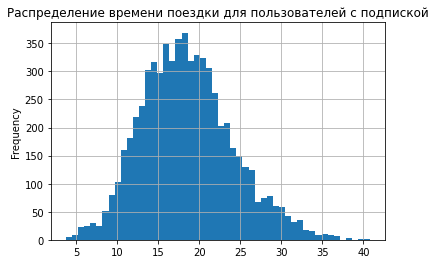

In [41]:
users_ultra['duration'].plot(
    kind='hist',
    bins=50,
    grid=True,
    title='Распределение времени поездки для пользователей с подпиской'
)

In [42]:
print(f'В среднем пользователь с подпиской проезжает расстояние в {users_ultra["distance"].mean():.2f} м')

В среднем пользователь с подпиской проезжает расстояние в 3115.45 м


<AxesSubplot:title={'center':'Распределение дистации поездки для пользователей с подпиской'}, ylabel='Frequency'>

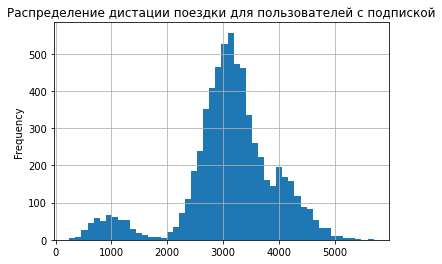

In [43]:
users_ultra['distance'].plot(
    kind='hist',
    bins=50,
    grid=True,
    title='Распределение дистации поездки для пользователей с подпиской'
)

In [44]:
mean_rides_ultra = users_ultra.shape[0] / len(users_ultra['user_id'].unique())
print(f'В среднем пользователь с подпиской совершает {mean_rides_ultra:.2f} поездки')

В среднем пользователь с подпиской совершает 9.30 поездки


**Вывод:** Среди пользователей с подпиской наблюдается немного другая картина. Среднее время их поездки больше - 18.54 мин. В отличии от пользователей без подписки распределение времени поездки уже не имеет всплеска в поездках до 1 мин. Однако распределение расстояния также имеет 2 пика. Но здесь малый пик значительно меньше по отношении к большому, чем у пользователей без подписки. Получается, что пользователи с подпиской в основном нацелены на длительные поездки. В среднем каждый пользователь с подпиской совершает 9.3 поездки.

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Cогласен со сравнением, в целом можно отметить, что профили пользователей обеих категорий похожи.

💡 Можно совместить на одном графике распределения пользователей с подпиской и без, для более наглядного сравнения.</div>

#### Шаг 5. Подсчёт выручки

Перед составлением датафрейма с агрегированным данными округлим все значения в столбце `duration` вверх

In [45]:
all_data['duration'] = np.ceil(all_data['duration']).astype('int')

In [46]:
agg_data = all_data.groupby(by=['user_id', 'month']).agg(
    {
        'distance': 'sum',
        'duration': 'sum',
        'name': 'count',
        'subscription_type': 'first',
        'minute_price': 'first',
        'start_ride_price': 'first',
        'subscription_fee': 'first'
    })
agg_data.rename(
    columns={
        'name': 'count_rides',
        'distance': 'sum_distance',
        'duration': 'sum_duration'
    },
    inplace=True
)
agg_data.reset_index(inplace=True)
agg_data.head()

,user_id,month,sum_distance,sum_duration,count_rides,subscription_type,minute_price,start_ride_price,subscription_fee
0,1,1,7027.511294,42,2,ultra,6,0,199
1,1,4,754.159807,7,1,ultra,6,0,199
2,1,8,6723.470560,46,2,ultra,6,0,199
3,1,10,5809.911100,32,2,ultra,6,0,199
4,1,11,7003.499363,56,3,ultra,6,0,199


In [47]:
def get_income(row):
    return (row['count_rides'] * row['start_ride_price']
            + row['sum_duration'] * row['minute_price']
            + row['subscription_fee'])

In [48]:
agg_data['income'] = agg_data.apply(get_income, axis=1)
agg_data.head()

,user_id,month,sum_distance,sum_duration,count_rides,subscription_type,minute_price,start_ride_price,subscription_fee,income
0,1,1,7027.511294,42,2,ultra,6,0,199,451
1,1,4,754.159807,7,1,ultra,6,0,199,241
2,1,8,6723.470560,46,2,ultra,6,0,199,475
3,1,10,5809.911100,32,2,ultra,6,0,199,391
4,1,11,7003.499363,56,3,ultra,6,0,199,535


In [49]:
# Код ревьюера
agg_data.groupby('subscription_type')['income'].mean()

subscription_type
free     328.641365
ultra    362.792191
Name: income, dtype: float64

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Выручка рассчитана верно. Молодец, что не забыл про округление длительности каждой поездки. 👍</div>

#### Шаг 6. Проверка гипотез

Установим уровень статистической значимости 1%

In [50]:
alpha = .01

##### Гипотеза о продолжительности поездки

$H_0$: Средняя продолжительность поездки пользователей с подпиской равна средней продолжительности поездки пользователей без подписки  
$H_1$: Средняя продолжительность поездки пользователей с подпиской больше средней продолжительности поездки пользователей без подписки  

In [51]:
results = st.ttest_ind(
    users_ultra['duration'],
    users_free['duration'],
    equal_var=False,
    alternative='greater'
)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 5.6757813771289775e-37
Отвергаем нулевую гипотезу


<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера V2 ✔️</b>

Гипотеза сформулирована и проверена правильно!</div>

<div class="alert-danger" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ❌</b>

<s>Некоторые блоки кода не работают. Посмотри, пожалуйста, что пошло не так. Перед отправкой проекта стоит проверять работоспособность кода — это можно сделать, нажав на панели Jupiter Hub ``Kernel`` и ``Restart & Run All`` (см скриншот ниже).
![](https://i.postimg.cc/yd19rYf6/Screenshot-428.png)</div>

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">
    
<b>Общий комментарий ревьюера</b>

Поправь пожалуйста код, чтобы я смог проверить твою работу до конца.
    
Также, постарайся отработать те комментарии, которые я уже дал.
    
Буду ждать твой доработанный проект. ⌛️</div>

<div class="alert-info" style="padding: 20px; border-radius: 10px">
<b>Комментарий студента 💎</b>

Извиняюсь за такую ситуации. Вроде, перед отправкой даже нажимал выполнить все ячейки, но когда просматривал не заметил, что удалил из импорта библиотеку. Из-за этого и появилась ошибка.  
Ошибку исправил.
</div>

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера V2 ✔️</b>

Принято. Теперь все супер!</div>

**Вывод:** в результате t-теста P-values ($5.7 * 10^{-34}$) оказался меньше уровня статичтической значимости (1%). Следовательно, нулевая гипотеза о том, что средняя продолжительность поездки пользователей с подпиской равна средней продолжительности поездки пользователей без подписки должна быть отвегнута в пользу гипотезы о том, что средняя продолжительность поездки пользователей с подпиской больше средней продолжительности поездки пользователей без подписки. А значит, пользователи с подпиской потенциально могут принести сервису больше денег.

##### Гипотеза о расстоянии, преодолеваемом пользователями с подпиской

$H_0$: Среднее расстояние, преодолеваемое пользователями с подпиской равно 3130 м  
$H_1$: Среднее расстояние, преодолеваемое пользователями с подпиской превышает 3130 м  

In [52]:
intrested_distance = 3130
results = st.ttest_1samp(
    users_ultra['distance'],
    intrested_distance,
    alternative='greater'
)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 0.9195368847849785
Не получилось отвергнуть нулевую гипотезу


**Вывод:** в результате t-теста P-values ($0.92$) оказался больше уровня статистической значимости (1%). Следовательно, нелувая гипотеза о том, что среднее расстояние, преодолеваемое пользователями с подпиской равно 3130 м не может быть отвергнута. А значит, не оснований полагать, что использование самоката пользователями без подписки больше вредит сервису, чем использование самоката пользователями без подписки. А значит, уже вторая гипотеза говорит нам о том, что подписка не приносит ущерб компании.

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера V2 ✔️</b>

Совершенно верно. 👌</div>

##### Гипотеза о выручке от пользователей с подпиской и без

$H_0$: Помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки  
$H_1$: Помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки  

In [53]:
income_users_ultra = agg_data.query('subscription_type == "ultra"')
income_users_free = agg_data.query('subscription_type == "free"')
                                    
results = st.ttest_ind(
    income_users_ultra['income'],
    income_users_free['income'],
    equal_var=False,
    alternative='greater'
)
print('p-значение:', results.pvalue)
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 8.874140893976874e-40
Отвергаем нулевую гипотезу


**Вывод:** в результате t-теста P-values($8.9 * 10^{-40}$) оказался меньше уровня статистической значимости  (1%). Следовательно, нулевая гипотеза о том, что помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки должна быть отвегнута в пользу гипотезы о том, что помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки. А значит, подписка должна быть выгодна компании

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера V2 ✔️</b>

Эта гипотеза также проверена правильно.</div>

##### Гипотеза о снижении обращений в тех поддержку

Для проверки данной гитехы необходимо использовать t-тест для зависимых выборок. Необходимо применить метод `ttest_rel()` из библиотеки `scipy.stats`. На вход ему необходимо наборы парных выборок: имеют одинаковый размер и порядок элементов.

**Общий вывод проверки гипотез:** в результате проверки гипотез можно сделать вывод о том, что подписка должна быть выгодна компании и приносить больше прибыли. Также нет оснований полагать, что пользователи с подпиской больше вредят самокатам в результате более интенсивного использования. Далее необходимо проверить данный выовд на практике и через какой-то время сделать повторное исследование. 

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера V2 ✔️</b>

Верно, чтобы проверить, значительно ли уменьшилось количество обращений в техподдержку после обновления серверов, можно использовать t-тест парных выборок.

</div>

#### Шаг 7. Распределения

##### Количество промокодов

По плану необходимо получить минимум 100 новых пользователей с подпиской. Вероятность, что план не будет выполнен должна составлять около 5%. Чтобы план был не выполнен необходимо, чтобы количество новых пользователей с подпиской было меньше либо равно 99.

In [54]:
p = .1
k = 100 # План по новым пользователям с подпиской
need_percent_fail = .05
delta = .0005
N = None
for n in range(k, 50*k):
    percent_fail = binom.cdf(k - 1, n, p)
    if need_percent_fail - delta <= percent_fail <= need_percent_fail + delta:
        N = n
        print(f'N = {N}')
        print(f'Вероятность не выполнить план при данном значении Т равна {percent_fail:.2%}')
        break;

N = 1161
Вероятность не выполнить план при данном значении Т равна 4.98%


Построим график распределения

/opt/conda/lib/python3.9/site-packages/scipy/stats/_discrete_distns.py:78: RuntimeWarning: divide by zero encountered in _binom_pdf
  return _boost._binom_pdf(x, n, p)


<BarContainer object of 1162 artists>

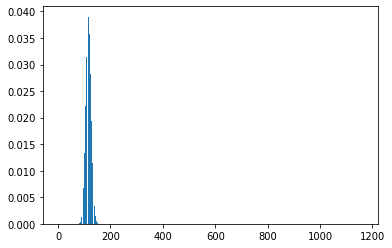

In [55]:
distr = []

for k in range(0, N+1):
    prob = binom.pmf(k, N, p)
    distr.append(prob)
    
plt.bar(range(0, N + 1), distr)

**Вывод**: с учетом поставленных условий необходимо разослать 1161 промокод на один бесплатный месяц подписки.

<div class="alert-success" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера ✔️</b>

Всё верно! 👍

</div>

##### Push-уведомления

Для решения поставленной задачи необходимо использовать биномиальное распределение.  
Проверим условия хорошей апроксимации биномиального распределения нормальным распределением

In [56]:
n = 10**6
p = .4

mu = n * p
sigma = sqrt(n * p * (1 - p))

if (mu - 3 * sigma >= 0) and (mu + 3 * sigma < n):
    print('Хорошие условия для апроксимации')
else:
    print('Плохие условия для апроксимации')

Хорошие условия для апроксимации


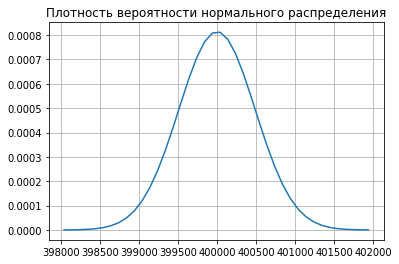

In [57]:
left = int(mu - 4 * sigma)
right = int(mu + 4 * sigma)
norm_distr = norm(mu, sigma)
x = range(left, right, 100)
ax = plt.subplot()
ax.plot(x, norm_distr.pdf(x))
plt.title('Плотность вероятности нормального распределения')
plt.grid(True)

In [58]:
need_clicks = 399500
prob = 1 - norm_distr.cdf(need_clicks)
print(f'Вероятность получить более {need_clicks} кликов равняяется {prob:.2%}')

Вероятность получить более 399500 кликов равняяется 84.63%


<div class="alert-warning" style="padding: 20px; border-radius: 10px">
<b>Комментарий ревьюера V2 ⚠️</b>

Правильнее так, раз мы считаем вероятность успеха 👇
</div>

In [59]:
# Код ревьюера
norm_distr.cdf(need_clicks)

0.15371708296369768

**Вывод:** для решения поставленной задачи необходимо использовать биномиальное распределение. Однако с заданными параметрами распределение хорошо аппроксимируется нормальным распределением. В результате была построена функция плотности вероятности аппроксимированной функции.  
399500 кликов будет получено с вероятностью 84.63%

#### Шаг 8. Общий вывод

В результате работы были исследованы данные о пользователях и их поездказ на самокатахх сервиса GoFast. В датасете присутствуют данные за 2021 год (с 2021-01-01 по 2021-12-30) 
Был проведен исследовательский анализ данных, который показал:  
1. Сервис охватывает широкий диапазон возврастных категорий. Самому младшему пользователю 12 лет, а самому старшему 43. Средний возраст - 24.9 года. Почти 95% пользователей являются платежеспособной целевой аудиторией: из них 79% в возрасте от 18 до 30 лет, 15.84% в возрасте старше 30 лет.  
2. 45.57% пользователей на данный момент имееют подписку Ultra.  
3. На данный момент сервис присутствует в 8 городах. Наибольшее количество пользователей находится в Пятигорске (219 человек), а наименьшее в Москве (168 человек). Однако нет сильно выделяющегося города по количеству пользователей.  
4. Распределение дистации за поездку имеет 2 пика, каждый из которых напоминает нормальное распределение. Первый пик имеет вершину на значении примерно 600 м, второй - 3200 м. Это говорит о том, что пользователи используют самокат как для быстрого добора до определенной точки, так и для прогулочной поездки. В среднем пользователи сервиса проезжают 3070 м.  
  
Были проверены 3 гипотезы: 
1. Гипотеза о том, что средняя продолжительность поездки пользователей с подпиской равна средней продолжительности поездки пользователей без подписки была отклонена в пользу гипотезы о том, что средняя продолжительность поездки пользователей с подпиской больше средней продолжительности поездки пользователей без подписки  
2. Гипотеза о том, что среднее расстояние, преодолеваемое пользователями с подпиской равно 3130 м не подтвердилась и была отклонена  
3. Помесячная выручка от пользователей с подпиской равна выручке от пользователей без подписки также была отклонена в пользу гипотезы о том, что помесячная выручка от пользователей с подпиской выше, чем от пользователей без подписки  
Все это говорит о том, что подписка должна быть выгодна компании и приносить больше прибыли. Также нет оснований полагать, что пользователи с подпиской больше вредят самокатам в результате более интенсивного использования. Следовательно, компании выгодно стремиться к увеличению пользователей с подпиской. Далее необходимо проверить данный выовд на практике и через какой-то время сделать повторное исследование.  
  
Если для увеличения числа подписок использовать акцию с раздачей промокода на один бесплатный месяц, то для того, чтобы получить 100 новых пользователей с подпиской с вероятностю 95.02% необходимо раздать 1161 промокод.  
При рассылки 1000000 Push-уведомлений более 399500 пользователей откоют данной уведомление с вероятностью 84.63%

<div class="alert-success" style="border-radius: 10px; padding: 20px">
<b>Комментарий ревьюера V2 ✔️</b>

У тебя получился подробный общий вывод, отражающий основные результаты исследования. </div>

<div style="border:solid steelblue 3px; padding: 20px; border-radius: 10px">
    
<b>Общий комментарий ревьюера V2</b>

Спасибо, что доработал проект! Критических замечаний нет, получилась очень хорошая работа.
    
Успехов в дальнейшем обучении! 🏆
    
</div>